In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
from sklearn.linear_model import LogisticRegression
import pymc3 as pm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

## The Dataset

You can download the dataset from here: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [35]:
## 1 point

## ToDo: read the csv file into a dataframe and show the first 5 rows
df=pd.read_csv("/Users/samiha/Desktop/DATA 606 - Algorithms for Data Science/diabetes.csv")
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
## 3 points

## Assign the Outcome variable to y and the rest to X.
y=df.Outcome
X=df.loc[:, df.columns != 'Outcome']


## Use LogisticRegression to fit the data and print out the intercept and the coefficients
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

logreg = LogisticRegression()
clf=logreg.fit(x_train,y_train)

y_pred=logreg.predict(x_test)

print(clf.coef_, clf.intercept_)


[[ 0.10313557  0.03481518 -0.01158117  0.00956165 -0.00132934  0.07765302
   1.27027865  0.0215741 ]] [-8.5036369]


/Users/samiha/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
## 2 points

## Explain what the code is doing:
# The code creates a normal distribution for each coefficient of the logistic regression


## What are the prior probabilities of the intercept and coefficients?


# Which likelihood distribution has been used?
## What does pm.invlogit(linreg) mean?
## What is map_est?

import pymc3 as pm 

with pm.Model() as logreg_model:
  
    w0 = pm.Normal('w0', mu=0, sd=100)
    w1 = pm.Normal('w1', mu=0, sd=100)
    w2 = pm.Normal('w2', mu=0, sd=100)
    w3 = pm.Normal('w3', mu=0, sd=100)
    w4 = pm.Normal('w4', mu=0, sd=100)
    w5 = pm.Normal('w5', mu=0, sd=100)
    w6 = pm.Normal('w6', mu=0, sd=100)
    w7 = pm.Normal('w7', mu=0, sd=100)
    w8 = pm.Normal('w8', mu=0, sd=100)
   
    
    linreg = w0 * np.ones(df.shape[0]) + w1 * df.Pregnancies.values + w2 * df.Glucose.values \
    + w3 * df.BloodPressure.values + w4 * df.SkinThickness.values + w5 * df.Insulin.values + \
    w6 * df.BMI.values + w7 * df.DiabetesPedigreeFunction.values + w8 * df.Age.values
    
    p_outcome = pm.invlogit(linreg)

    likelihood = pm.Bernoulli('likelihood', p_outcome, observed=df.Outcome.values)

    
    map_est= pm.find_MAP()
    print(map_est)


{'w0': array(-8.40323436), 'w1': array(0.12312602), 'w2': array(0.03516102), 'w3': array(-0.01329091), 'w4': array(0.0006255), 'w5': array(-0.00119205), 'w6': array(0.08967318), 'w7': array(0.945027), 'w8': array(0.0148609)}


<ipython-input-52-dc55a22b822e>:6: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(400,random_seed=123, progressbar=True)
Only 400 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [w8, w7, w6, w5, w4, w3, w2, w1, w0]


Sampling 2 chains for 1_000 tune and 400 draw iterations (2_000 + 800 draws total) took 47 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/samiha/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'w0'}>,
        <AxesSubplot:title={'center':'w1'}>,
        <AxesSubplot:title={'center':'w2'}>],
       [<AxesSubplot:title={'center':'w3'}>,
        <AxesSubplot:title={'center':'w4'}>,
        <AxesSubplot:title={'center':'w5'}>],
       [<AxesSubplot:title={'center':'w6'}>,
        <AxesSubplot:title={'center':'w7'}>,
        <AxesSubplot:title={'center':'w8'}>]], dtype=object)

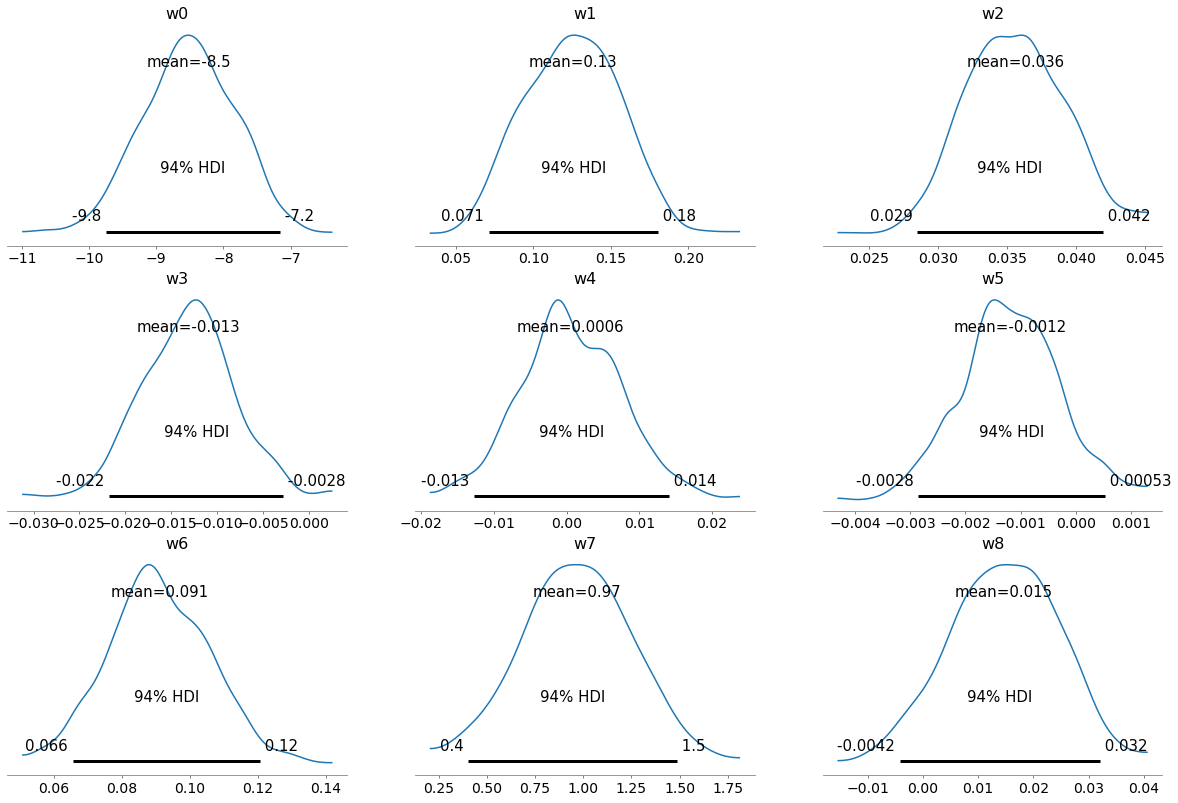

In [52]:
## 2 points

with logreg_model:
## ToDo: draw 400 samples using pm.Metropolis() and assign to the variable trace
    step = pm.Metropolis() # Have a choice of samplers
    trace = pm.sample(400,random_seed=123, progressbar=True)
    
## Explain the output of the plot 
az.plot_posterior(trace)

# Plots the posterior distribution of each coefficient